In [1]:
dataset_name = "loris3/stratified_equitoken_10m_curriculum"
curriculum_name ="random.pt"
model_type = ""

In [2]:
import plotting

2024-12-16 08:29:11.458152: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-16 08:29:11.489599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-16 08:29:11.489617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-16 08:29:11.490795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 08:29:11.497003: I tensorflow/core/platform/cpu_feature_guar

In [3]:
df, curriculum = plotting.load_data_for_plotting(dataset_name, curriculum_name, model_type=model_type)

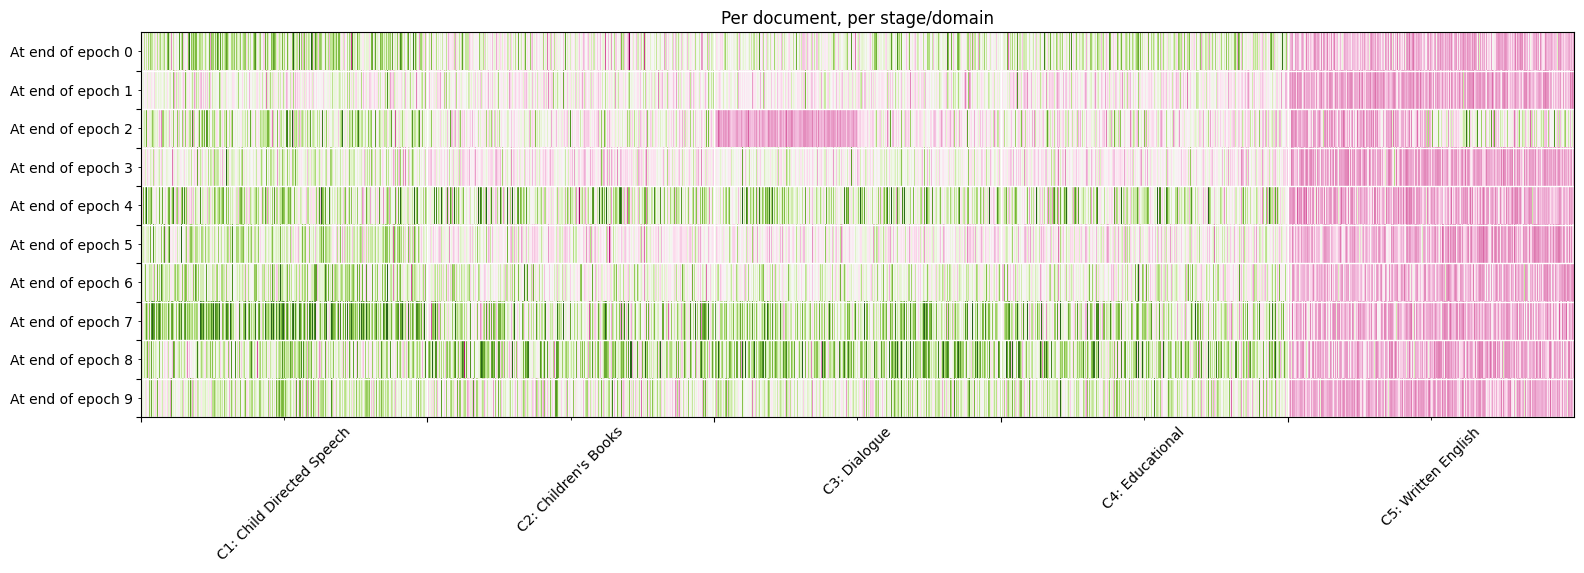

In [4]:
plotting.plot_per_document_per_stage(df)

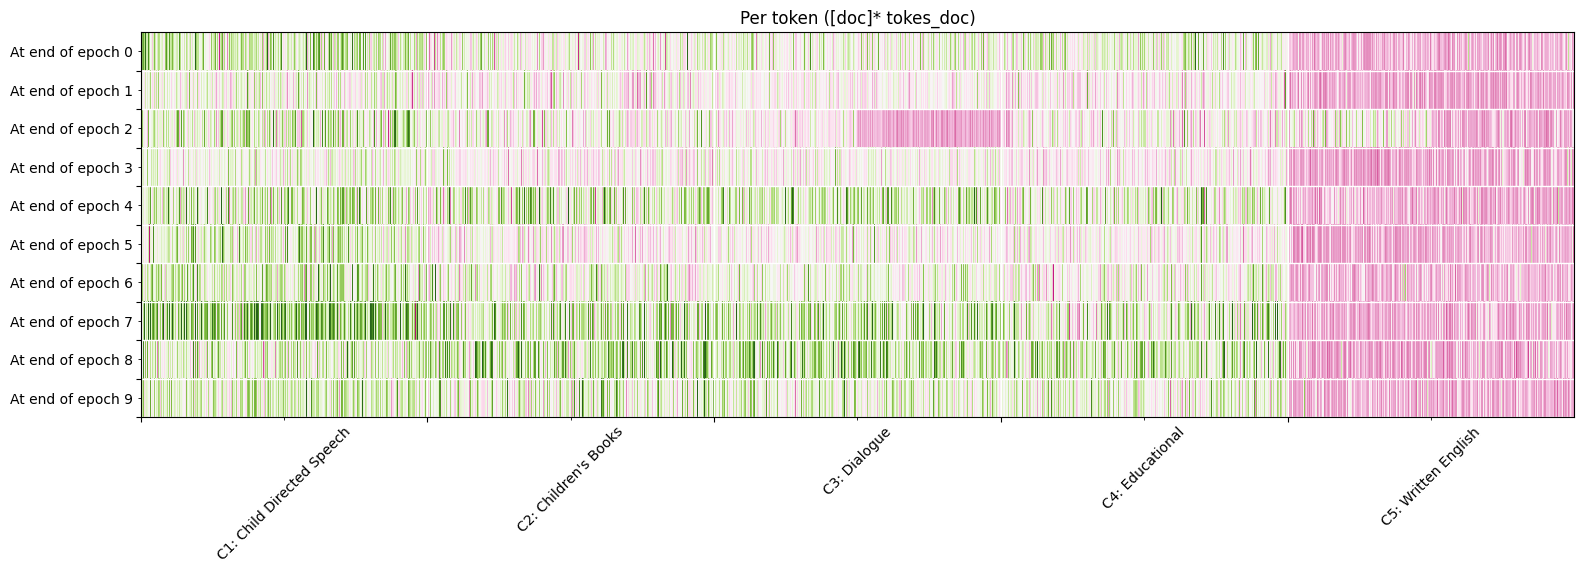

In [5]:
plotting.plot_per_token_per_stage(df)

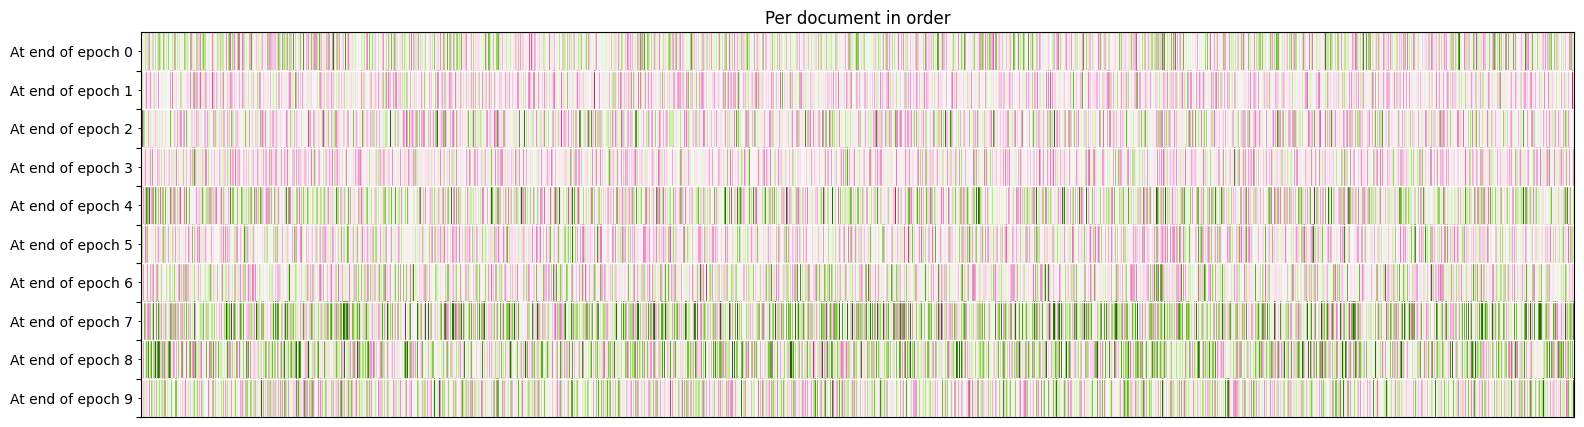

In [6]:
plotting.plot_per_document_in_order(df, curriculum)

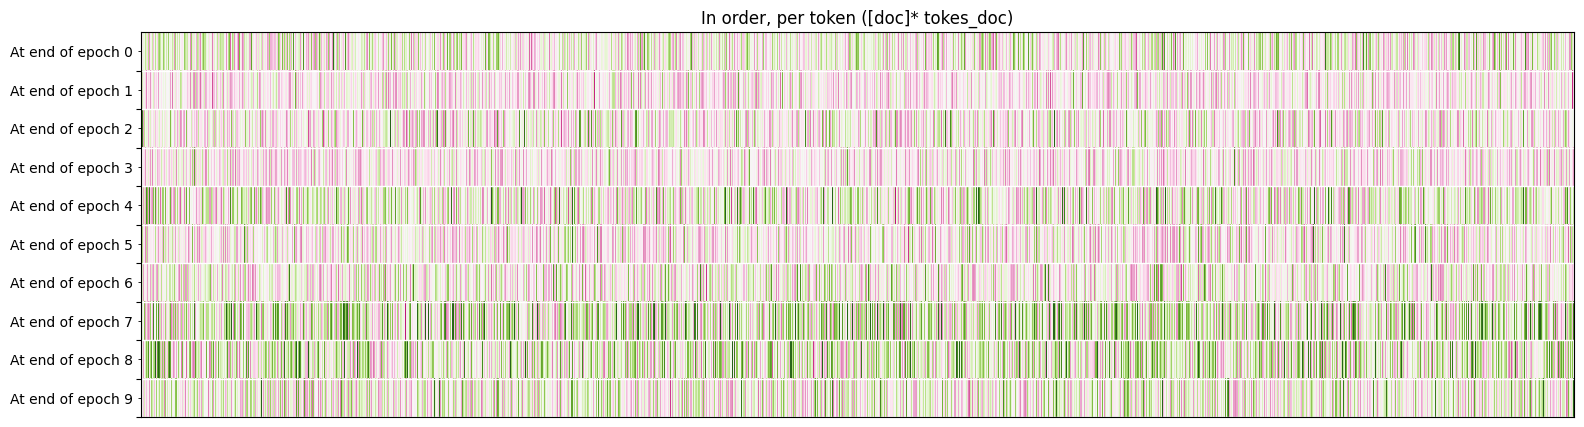

In [7]:
plotting.plot_per_token_in_order(df,curriculum)

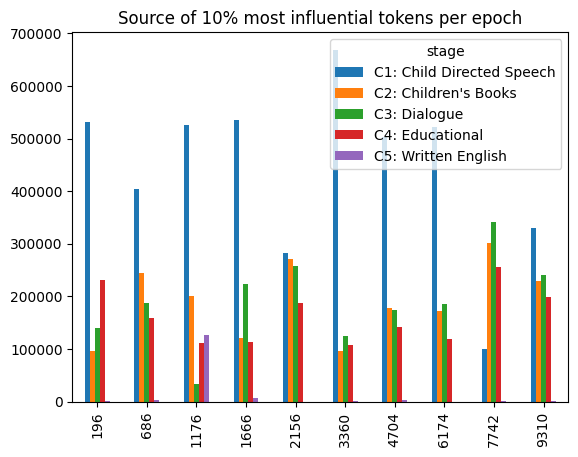

Text(0.5, 1.0, 'Source of 10% least influential tokens per epoch')

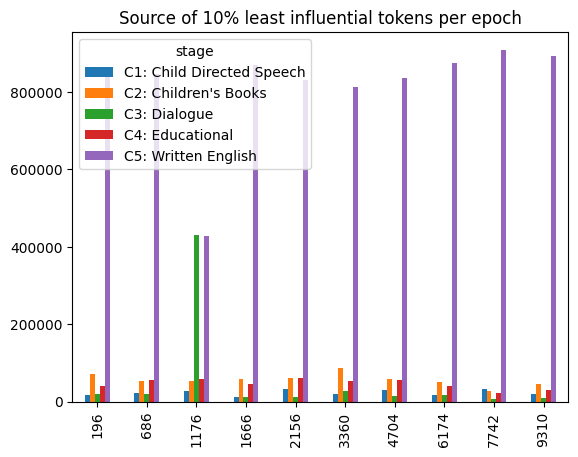

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

pd.concat([pd.concat([df[col].repeat(df["document_lenght"]), df["stage"].repeat(df["document_lenght"])],axis=1).sort_values(by=col,ascending=False).head(int(df["document_lenght"].sum()*0.1)).groupby("stage").count() for col in df.columns[0:-5]],axis=1).T.plot.bar()
plt.title("Source of 10% most influential tokens per epoch")
plt.show()
pd.concat([pd.concat([df[col].repeat(df["document_lenght"]), df["stage"].repeat(df["document_lenght"])],axis=1).sort_values(by=col,ascending=False).tail(int(df["document_lenght"].sum()*0.1)).groupby("stage").count() for col in df.columns[0:-5]],axis=1).T.plot.bar()
plt.title("Source of 10% least influential tokens per epoch")

<Axes: >

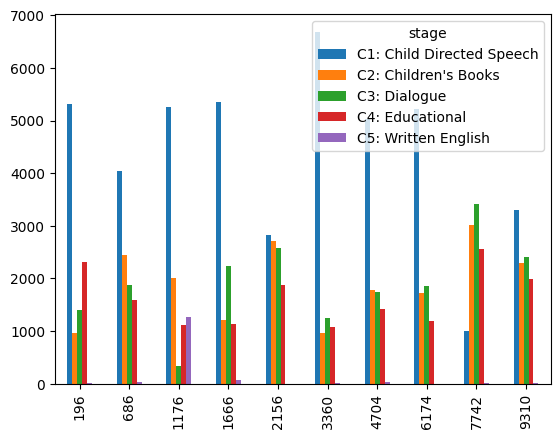

In [9]:
import pandas as pd
pd.concat([df[[col,"stage"]].sort_values(by=col,ascending=False).head(int(len(df)*0.1)).groupby("stage").count() for col in df.columns[0:-5]],axis=1).T.plot.bar()

In [10]:
dfb = df[["total","document_lenght","stage"]].sort_values(by="total",ascending=False).head(int(len(df)*0.1))

In [11]:
dfb = df[["total","document_lenght","stage"]].sort_values(by="total",ascending=False).head(int(len(df)*0.1))

<Axes: xlabel='document_lenght', ylabel='Count'>

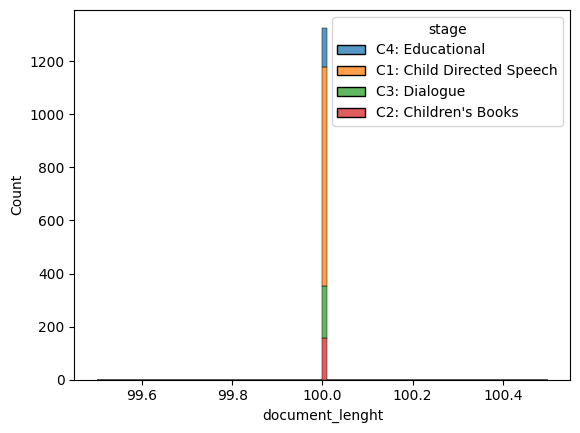

In [12]:
import seaborn as sns
sns.histplot(dfb, x="document_lenght", bins=100, weights=dfb["total"], hue="stage",multiple="stack")


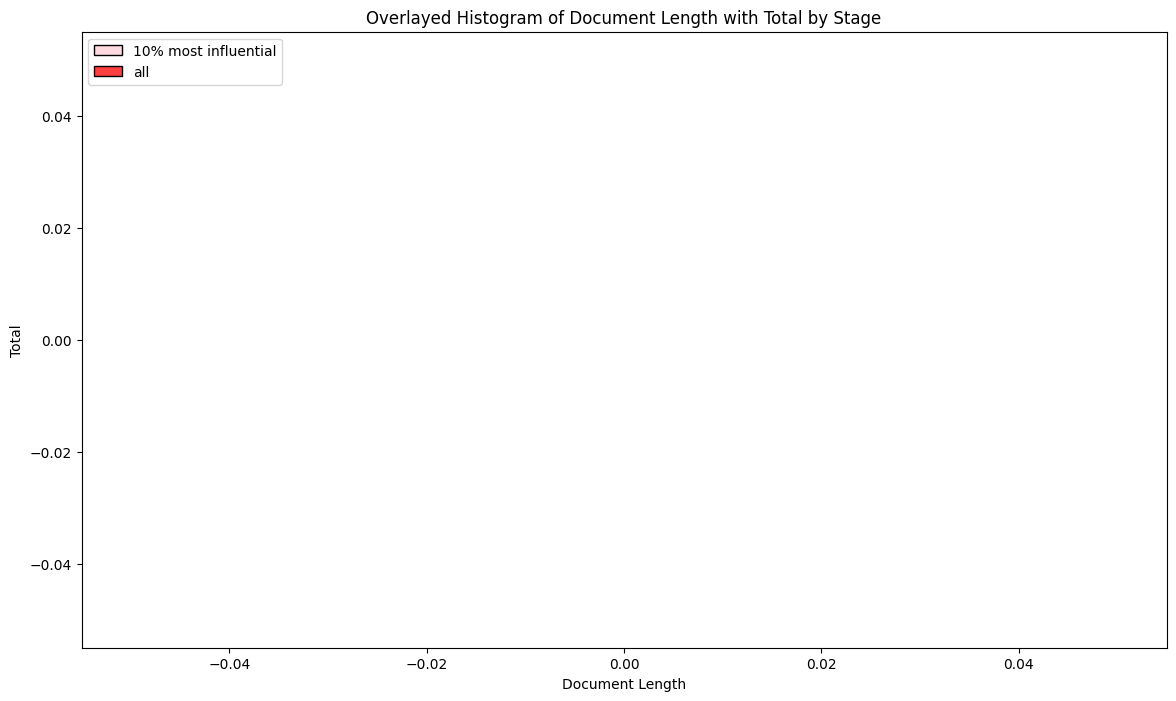

In [13]:

plt.figure(figsize=(14, 8))

# Plot the first histogram

sns.histplot(data=dfb, label="10% most influential",x="document_lenght", bins=100, weights=dfb["total"], multiple="stack", color="pink",alpha=0.6, stat="percent",binrange=(0,60))
sns.histplot(data=df, label="all", x="document_lenght", bins=100, weights=df["total"],  multiple="stack",shrink=0.5,color="red", stat="percent",binrange=(0,60))

# Plot the second histogram with a different visual style

plt.title('Overlayed Histogram of Document Length with Total by Stage')
plt.xlabel('Document Length')
plt.ylabel('Total')
plt.legend()

plt.show()

In [14]:
df.groupby("stage")["document_lenght"].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
C1: Child Directed Speech,20000.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
C2: Children's Books,20000.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
C3: Dialogue,20000.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
C4: Educational,20000.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
C5: Written English,20000.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


In [15]:
zgotrefoül+ö

NameError: name 'zgotrefoül' is not defined

In [ ]:
import pandas as pd
pd.concat([df[[col,"document_lenght"]].sort_values(by=col,ascending=False).head(int(len(df)*0.1)) for col in df.columns[0:-5]],axis=1).T.plot.bar()

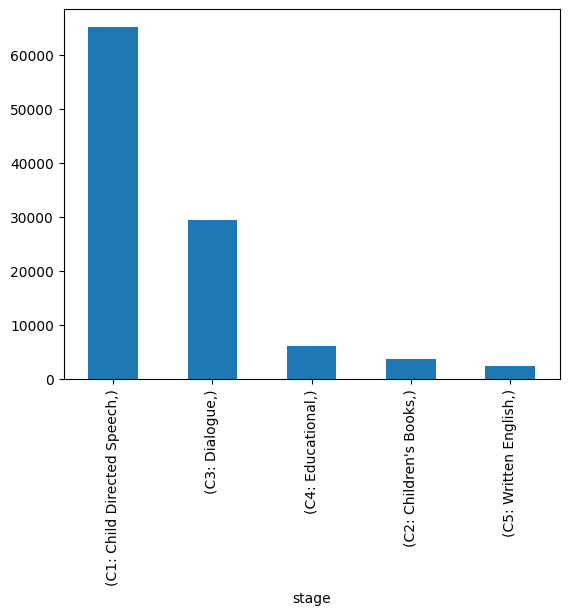

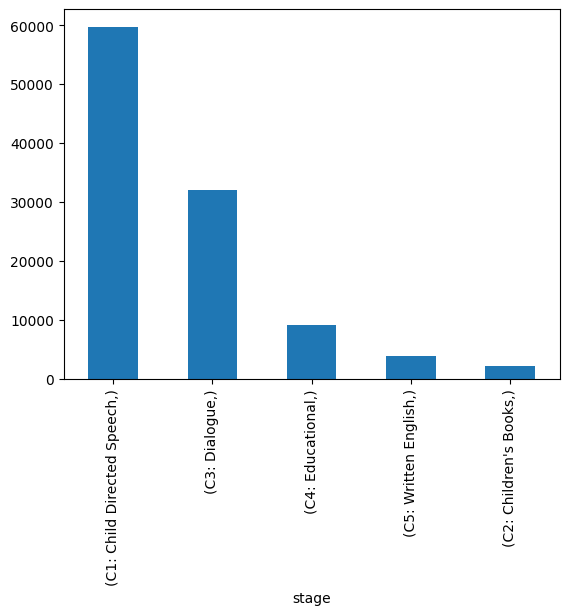

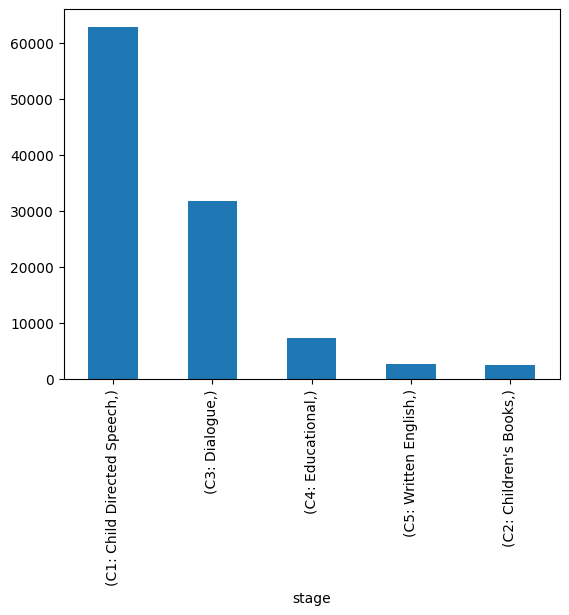

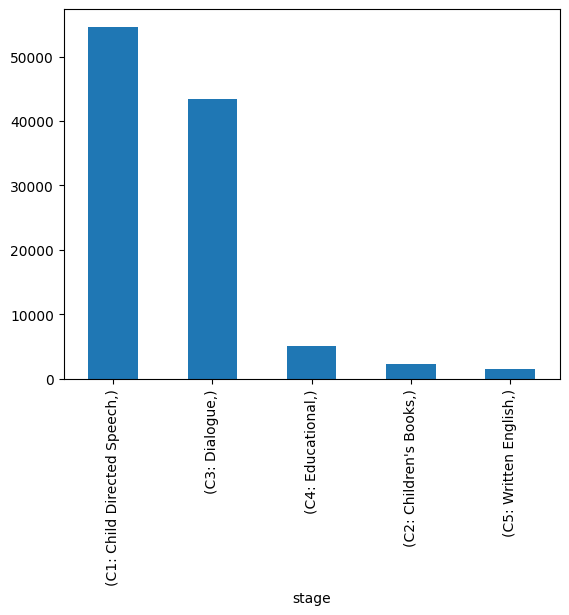

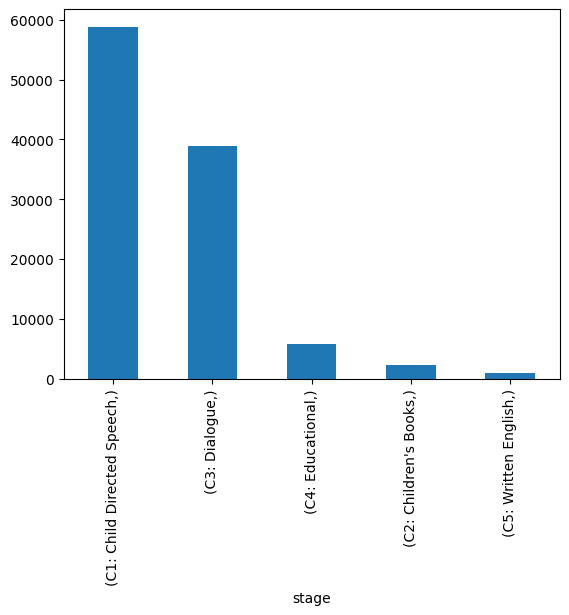

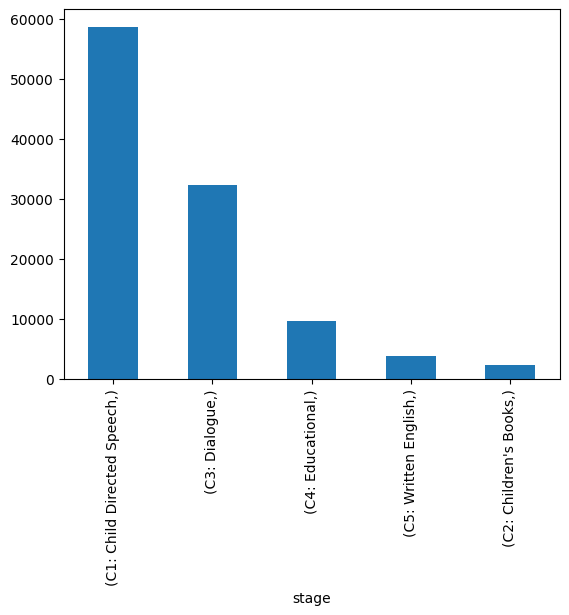

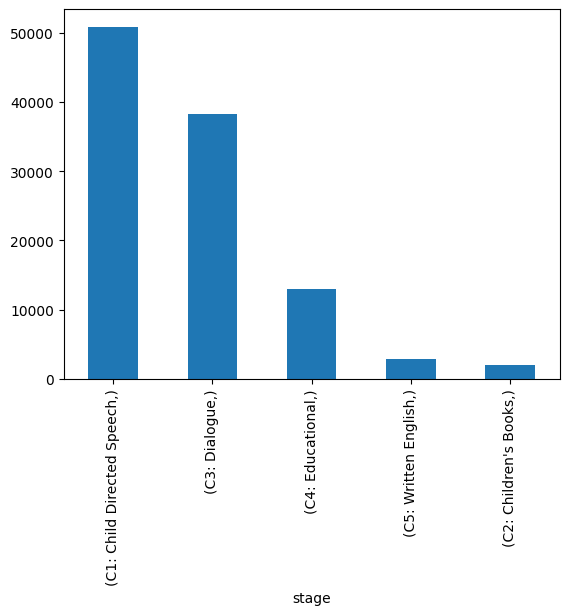

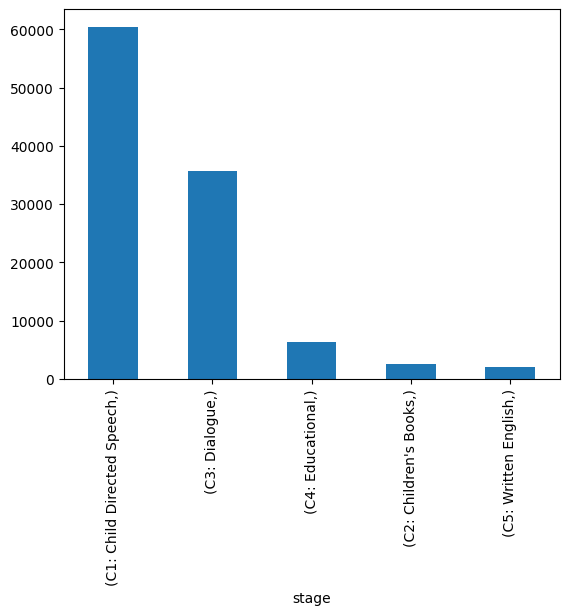

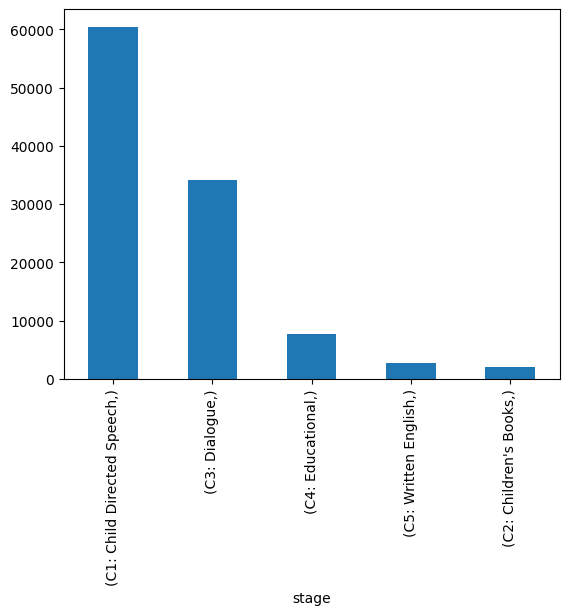

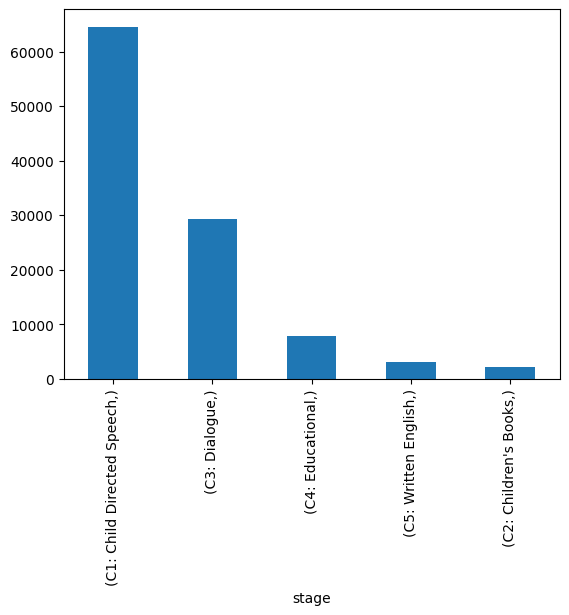

In [ ]:
from matplotlib import pyplot as plt


for col in df.columns[0:-5]:
    df[[col,"stage"]].sort_values(by=col,ascending=False).head(int(len(df)*0.1)).value_counts(subset=["stage"]).plot.bar()
    plt.show()

In [ ]:
df["stage"].unique()

array(['C1: Child Directed Speech', "C2: Children's Books",
       'C3: Dialogue', 'C4: Educational', 'C5: Written English'],
      dtype=object)